In [ ]:
library(Seurat)
library(Signac)

In [ ]:
# compare demuxlet doublet calls vs doubletfinder
# for a sample

In [ ]:
### for the merged and clustered object, originally skipped cellbender and doubletfinder

In [1]:
sobj <- readRDS('/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/05_multiome_md_merge_8/231108_01_merged_multiome_lung8.RDS')

In [2]:
sobj

Loading required package: SeuratObject

Warning message:
“package ‘SeuratObject’ was built under R version 4.1.3”
Loading required package: sp

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Loading required package: Seurat

Loading required package: Signac



An object of class Seurat 
242016 features across 159947 samples within 3 assays 
Active assay: ATAC_comb (172997 features, 0 variable features)
 2 other assays present: RNA, SCT

In [3]:
colnames(sobj@meta.data)

[1] "BARCODE"              "orig.ident"           "nCount_RNA"          
 [4] "nFeature_RNA"         "nCount_ATAC"          "nFeature_ATAC"       
 [7] "fragments_freq_count" "FRiP"                 "percent.mt"          
[10] "nCount_SCT"           "nFeature_SCT"         "INT_ID"              
[13] "NUM.SNPS"             "NUM.READS"            "DROPLET.TYPE"        
[16] "BEST.GUESS"           "BEST.LLK"             "NEXT.GUESS"          
[19] "NEXT.LLK"             "DIFF.LLK.BEST.NEXT"   "BEST.POSTERIOR"      
[22] "SNG.POSTERIOR"        "SNG.BEST.GUESS"       "SNG.BEST.LLK"        
[25] "SNG.NEXT.GUESS"       "SNG.NEXT.LLK"         "SNG.ONLY.POSTERIOR"  
[28] "DBL.BEST.GUESS"       "DBL.BEST.LLK"         "DIFF.LLK.SNG.DBL"    
[31] "nCount_ATAC_comb"     "nFeature_ATAC_comb"

In [8]:
library(repr)
options(repr.matrix.max.cols=50, repr.matrix.max.rows=100)

head(sobj@meta.data)

,BARCODE,orig.ident,nCount_RNA,nFeature_RNA,nCount_ATAC,nFeature_ATAC,fragments_freq_count,FRiP,percent.mt,nCount_SCT,nFeature_SCT,INT_ID,NUM.SNPS,NUM.READS,DROPLET.TYPE,BEST.GUESS,BEST.LLK,NEXT.GUESS,NEXT.LLK,DIFF.LLK.BEST.NEXT,BEST.POSTERIOR,SNG.POSTERIOR,SNG.BEST.GUESS,SNG.BEST.LLK,SNG.NEXT.GUESS,SNG.NEXT.LLK,SNG.ONLY.POSTERIOR,DBL.BEST.GUESS,DBL.BEST.LLK,DIFF.LLK.SNG.DBL,nCount_ATAC_comb,nFeature_ATAC_comb
,<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>
QY_2225_2_QY_2224_2_AAACAGCCAAACGGGC-1,AAACAGCCAAACGGGC-1,QY_2225_2_QY_2224_2,6581,3072,5854,2926,9272,0.6313632,1.1092539,6172,3071,7,1349,1351,SNG,"UCSDX51_UCSDX51,UCSDX51_UCSDX51,0.00",-243.32,"D381_D381,UCSDX51_UCSDX51,0.50",-301.66,58.34,-2.5e+02,1,UCSDX51_UCSDX51,-243.32,D371_D371,-574.97,0,"D381_D381,UCSDX51_UCSDX51,0.50",-301.66,58.34,3588,3295
QY_2225_2_QY_2224_2_AAACAGCCAAAGGTAC-1,AAACAGCCAAAGGTAC-1,QY_2225_2_QY_2224_2,6785,2512,2357,1209,3871,0.6088866,3.3898305,6013,2512,18,672,743,SNG,"D265_D265,D265_D265,0.00",-173.03,"D265_D265,UCSDX3_UCSDX3,0.50",-182.59,9.56,-1.8e+02,1,D265_D265,-173.03,UCSDX3_UCSDX3,-291.65,0,"D265_D265,UCSDX3_UCSDX3,0.50",-182.59,9.56,1408,1327
QY_2225_2_QY_2224_2_AAACAGCCAAATACCT-1,AAACAGCCAAATACCT-1,QY_2225_2_QY_2224_2,773,607,2335,1213,3731,0.6258376,1.1642950,4272,1536,19,378,378,SNG,"UCSDX19_UCSDX19,UCSDX19_UCSDX19,0.00",-68.06,"UCSDX19_UCSDX19,UCSDX31_UCSDX31,0.50",-79.20,11.14,-7.2e+01,1,UCSDX19_UCSDX19,-68.06,UCSDX51_UCSDX51,-145.11,0,"UCSDX19_UCSDX19,UCSDX31_UCSDX31,0.50",-79.20,11.14,1383,1332
QY_2225_2_QY_2224_2_AAACAGCCAATTGACT-1,AAACAGCCAATTGACT-1,QY_2225_2_QY_2224_2,1709,1121,8280,4112,20682,0.4003481,2.5746050,4407,1349,102,1938,1938,SNG,"UCSDX42_UCSDX42,UCSDX42_UCSDX42,0.00",-391.82,"UCSDX40_UCSDX40,UCSDX42_UCSDX42,0.50",-486.25,94.43,-4.0e+02,1,UCSDX42_UCSDX42,-391.82,UCSDX40_UCSDX40,-956.91,0,"UCSDX40_UCSDX40,UCSDX42_UCSDX42,0.50",-486.25,94.43,5443,4916
QY_2225_2_QY_2224_2_AAACAGCCACATAGCC-1,AAACAGCCACATAGCC-1,QY_2225_2_QY_2224_2,5791,2752,84,43,81,1.0370370,0.4144362,5755,2752,132,312,317,SNG,"D339_D339,D339_D339,0.00",-45.57,"D339_D339,D371_D371,0.50",-62.54,16.96,-5.0e+01,1,D339_D339,-45.57,UCSDX2_UCSDX2,-129.87,0,"D339_D339,D371_D371,0.50",-62.54,16.96,47,46
QY_2225_2_QY_2224_2_AAACAGCCACCAGCAT-1,AAACAGCCACCAGCAT-1,QY_2225_2_QY_2224_2,13831,4553,7542,3804,9703,0.7772854,0.6217916,6228,3301,139,1859,1884,DBL,"UCSDX19_UCSDX19,UCSDX44_UCSDX44,0.50",-468.25,"UCSDX44_UCSDX44,UCSDX19_UCSDX19,0.50",-468.25,0.00,5.0e-207,1,UCSDX44_UCSDX44,-625.03,UCSDX19_UCSDX19,-680.52,0,"UCSDX19_UCSDX19,UCSDX44_UCSDX44,0.50",-468.25,-156.78,4544,4212


In [10]:
donor51 <- subset(sobj, subset = SNG.BEST.GUESS == "UCSDX51_UCSDX51")

In [11]:
donor51

An object of class Seurat 
242016 features across 7336 samples within 3 assays 
Active assay: ATAC_comb (172997 features, 0 variable features)
 2 other assays present: RNA, SCT

In [12]:
saveRDS(donor51, "/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/sandbox/UCSDX51.RDS")

In [9]:
unique(sobj$SNG.BEST.GUESS)

[1] "UCSDX51_UCSDX51" "D265_D265"       "UCSDX19_UCSDX19" "UCSDX42_UCSDX42"
 [5] "D339_D339"       "UCSDX44_UCSDX44" "D335_D335"       "UCSDX31_UCSDX31"
 [9] "UCSDX40_UCSDX40" "UCSDX53_UCSDX53" "D357_D357"       "UCSDX3_UCSDX3"  
[13] "D381_D381"       "UCSDX24_UCSDX24" "UCSDX7_UCSDX7"   "UCSDX50_UCSDX50"
[17] "D347_D347"       "UCSDX28_UCSDX28" "UCSDX13_UCSDX13" "D356_D356"      
[21] "UCSDX21_UCSDX21" "UCSDX2_UCSDX2"   "D116_D116"       "D283_D283"      
[25] "UCSDX38_UCSDX38" "UCSDX58_UCSDX58" "D071_D071"       "D371_D371"      
[29] "D239_D239"       "UCSDX8_UCSDX8"

In [22]:
donor51 <- readRDS("/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/sandbox/UCSDX51.RDS")

In [14]:
correction <- 'nobatch'

In [17]:
red_nm_rna <- ifelse(correction == "batch", "harmony.rna", "pca")
red_nm_rna_umap <- ifelse(correction == "batch", "umap.hrm.rna", "umap.rna")

In [ ]:
# during doubletfinder finder sct was done per lane (done for each of the 8 reactions)
# skipped doubletfinder part but only ran

#sobj <- SCTransform(sobj, verbose = FALSE)
#sobj <- RunPCA(sobj, features = VariableFeatures(object = sobj), npcs = 50, verbose = FALSE)
#sobj <- RunUMAP(sobj, dims = 1:50)


## ? after separating into donors, should i run sct by donor now instead of by lane? 
## probs not cuz then we'd be correcting for donor and not by lane, when the experiment was originally
# done by lane

In [23]:
donor51

An object of class Seurat 
242016 features across 7336 samples within 3 assays 
Active assay: ATAC_comb (172997 features, 0 variable features)
 2 other assays present: RNA, SCT

In [24]:
DefaultAssay(donor51) <- 'SCT'

In [25]:
VariableFeatures(donor51) #variable features lost after merge presumably

character(0)

In [27]:
table(donor51@meta.data$orig.ident)


QY_2225_2_QY_2224_2 QY_2227_2_QY_2226_2 QY_2229_2_QY_2228_2 QY_2231_2_QY_2230_2 
                829                 950                 924                 909 
QY_2233_2_QY_2232_2 QY_2235_2_QY_2234_2 QY_2237_2_QY_2236_2 QY_2239_2_QY_2238_2 
                979                 938                 921                 886 

In [28]:
sobj_all_samp_spl <- SplitObject(donor51, split.by = 'orig.ident')
# split by lane

In [30]:
# running split by dataset to be similar to when i run sct per dataset (lane) for doubletfinder
Sys.time()
sobj_all_samp_spl_li <- lapply(X = sobj_all_samp_spl, FUN = SCTransform,
                       verbose = FALSE,
                       vst.flavor = "v2",
                       variable.features.n = 5000,
                       conserve.memory = T)

Sys.time()


[1] "2023-11-20 11:42:29 PST"

Will not return corrected UMI because residual type is not set to 'pearson'

Will not return corrected UMI because residual type is not set to 'pearson'

Will not return corrected UMI because residual type is not set to 'pearson'

Will not return corrected UMI because residual type is not set to 'pearson'

Will not return corrected UMI because residual type is not set to 'pearson'

Will not return corrected UMI because residual type is not set to 'pearson'

Will not return corrected UMI because residual type is not set to 'pearson'

Will not return corrected UMI because residual type is not set to 'pearson'



[1] "2023-11-20 11:49:40 PST"

In [33]:
var.features <- SelectIntegrationFeatures(object.list = sobj_all_samp_spl_li, nfeatures = 5000)


In [36]:
head(donor51@assays$SCT@counts)

  [[ suppressing 7336 column names ‘QY_2225_2_QY_2224_2_AAACAGCCAAACGGGC-1’, ‘QY_2225_2_QY_2224_2_AAACATGCAAGCTTTG-1’, ‘QY_2225_2_QY_2224_2_AAACATGCAGGCGATA-1’ ... ]]



6 x 7336 sparse Matrix of class "dgCMatrix"
                                                                              
AL627309.1 . . . . . . . . . . . . . 1 . . . . . . . . . . . . . . . . . . . .
AL627309.3 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AL627309.5 . . . . 1 . . . . . . . . . . . 1 . . . . . . . . . . 1 . 1 . . . .
AL627309.4 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AP006222.2 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AL669831.2 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
                                                                              
AL627309.1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AL627309.3 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AL627309.5 . . . . . . . . . . . . . 1 . . . . . . . . . . . . . . . . . . . .
AL627309.4 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AP006222

In [37]:
head(donor51@assays$SCT@data)

  [[ suppressing 7336 column names ‘QY_2225_2_QY_2224_2_AAACAGCCAAACGGGC-1’, ‘QY_2225_2_QY_2224_2_AAACATGCAAGCTTTG-1’, ‘QY_2225_2_QY_2224_2_AAACATGCAGGCGATA-1’ ... ]]



6 x 7336 sparse Matrix of class "dgCMatrix"
                                                                              
AL627309.1 . . . . .         . . . . . . . . 0.6931472 . . .         . . . . .
AL627309.3 . . . . .         . . . . . . . . .         . . .         . . . . .
AL627309.5 . . . . 0.6931472 . . . . . . . . .         . . 0.6931472 . . . . .
AL627309.4 . . . . .         . . . . . . . . .         . . .         . . . . .
AP006222.2 . . . . .         . . . . . . . . .         . . .         . . . . .
AL669831.2 . . . . .         . . . . . . . . .         . . .         . . . . .
                                                                            
AL627309.1 . . . . . .         . .         . . . . . . . . . . . . . . . . .
AL627309.3 . . . . . .         . .         . . . . . . . . . . . . . . . . .
AL627309.5 . . . . . 0.6931472 . 0.6931472 . . . . . . . . . . . . . . . . .
AL627309.4 . . . . . .         . .         . . . . . . . . . . . . . . . . .
AP006222.2 . . . .

In [38]:
head(donor51@assays$SCT@scale.data)

,QY_2225_2_QY_2224_2_AAACAGCCAAACGGGC-1,QY_2225_2_QY_2224_2_AAACATGCAAGCTTTG-1,QY_2225_2_QY_2224_2_AAACATGCAGGCGATA-1,QY_2225_2_QY_2224_2_AAACCGAAGCACAGGG-1,QY_2225_2_QY_2224_2_AAACCGAAGGCCAATT-1,QY_2225_2_QY_2224_2_AAACCGCGTGCACGCA-1,QY_2225_2_QY_2224_2_AAACGCGCAGCCTTGG-1,QY_2225_2_QY_2224_2_AAAGGAGCACTGGCTG-1,QY_2225_2_QY_2224_2_AAAGGCTCAGTAAAGC-1,QY_2225_2_QY_2224_2_AAAGGTTAGCGCCTAA-1,QY_2225_2_QY_2224_2_AAATGCCTCGGCCATA-1,QY_2225_2_QY_2224_2_AACAGATAGGCAATAG-1,QY_2225_2_QY_2224_2_AACAGCAAGCCGCAAC-1,QY_2225_2_QY_2224_2_AACAGCAAGCTTATGA-1,QY_2225_2_QY_2224_2_AACATAGCATATTGAC-1,QY_2225_2_QY_2224_2_AACATTGTCATTGTTC-1,QY_2225_2_QY_2224_2_AACCGCTCAATCCTAG-1,QY_2225_2_QY_2224_2_AACCGGCTCCACAATA-1,QY_2225_2_QY_2224_2_AACCTTAAGAATCGCT-1,QY_2225_2_QY_2224_2_AACGCCCAGCCAGTAT-1,QY_2225_2_QY_2224_2_AACGGTAAGTTAACCA-1,QY_2225_2_QY_2224_2_AACTACTCAACAGCCT-1,QY_2225_2_QY_2224_2_AACTACTCAGCCAGTT-1,QY_2225_2_QY_2224_2_AACTTAGTCGTTTCCA-1,QY_2225_2_QY_2224_2_AAGAATCAGTGAGCGG-1,⋯,QY_2239_2_QY_2238_2_TTGGATCAGGCCGGAA-1,QY_2239_2_QY_2238_2_TTGGCGGGTCAATGTG-1,QY_2239_2_QY_2238_2_TTGGCTACATGAATAG-1,QY_2239_2_QY_2238_2_TTGGCTTGTCCAAATG-1,QY_2239_2_QY_2238_2_TTGGGCGGTTAAATGC-1,QY_2239_2_QY_2238_2_TTGGGTTAGTGAGCGG-1,QY_2239_2_QY_2238_2_TTGGTGAGTACTGATG-1,QY_2239_2_QY_2238_2_TTGGTGAGTCTAACAG-1,QY_2239_2_QY_2238_2_TTGTCCCAGGTGAAAT-1,QY_2239_2_QY_2238_2_TTTAACCTCATAGCCG-1,QY_2239_2_QY_2238_2_TTTAACGAGTTACTTC-1,QY_2239_2_QY_2238_2_TTTAAGGTCGGTCATG-1,QY_2239_2_QY_2238_2_TTTACGAAGCAAGGGT-1,QY_2239_2_QY_2238_2_TTTACGCGTGCTGGTG-1,QY_2239_2_QY_2238_2_TTTCACCCAATCCTAG-1,QY_2239_2_QY_2238_2_TTTCACCCAGGCTACT-1,QY_2239_2_QY_2238_2_TTTCCGGGTGGAGCAA-1,QY_2239_2_QY_2238_2_TTTCGTCCAGGCCAAA-1,QY_2239_2_QY_2238_2_TTTCTTGCATGGCCCA-1,QY_2239_2_QY_2238_2_TTTGACTTCACGCATG-1,QY_2239_2_QY_2238_2_TTTGCATTCATCCTGC-1,QY_2239_2_QY_2238_2_TTTGCATTCTACCTGC-1,QY_2239_2_QY_2238_2_TTTGCGGAGGTATTGC-1,QY_2239_2_QY_2238_2_TTTGTGTTCACAGCGC-1,QY_2239_2_QY_2238_2_TTTGTTGGTTCGCGCT-1
AL645608.1,-0.02516299,-0.02297427,-0.02905851,-0.01564103,-0.02944595,-0.03185375,-0.01422654,-0.02714281,-0.02360705,-0.02651707,-0.03407800,-0.02641357,-0.03115497,-0.03218468,-0.02290659,-0.02908639,-0.03252283,-0.01455308,-0.03282298,-0.02716694,-0.01078246,-0.02415603,-0.03506960,-0.02989947,-0.02880433,⋯,-0.02726400,0.003056864,-0.01088389,0.002074034,-0.02426036,-0.01796995,-0.01802944,-0.03180140,-0.01432711,-0.02844683,-0.01662784,-0.01411621,-0.01954910,-0.02077935,-0.001374968,-0.02800015,-0.008215634,-0.000310279,-0.03353497,-0.02479005,-0.02084478,-0.01023552,0.001291938,-0.003444729,-0.03651475
TNFRSF18,-0.06537712,-0.06203569,-0.07126054,-0.05070341,-0.07184069,-0.07542386,-0.04850144,-0.06837824,-0.06300410,-0.06743206,-0.07869746,-0.06727535,-0.07438805,-0.07591320,-0.06193200,-0.07130232,-0.07641240,-0.04901003,-0.07685482,-0.06841468,-0.04313185,-0.06384274,-0.08014487,-0.07251857,-0.07087941,⋯,-0.06519967,-0.023296709,-0.04396015,-0.024854851,-0.06151589,-0.05350228,-0.05358002,-0.07059701,-0.04866786,-0.06662586,-0.05173818,-0.04838345,-0.05555304,-0.05713235,-0.030183282,-0.06608889,-0.040214596,-0.028560073,-0.07260733,-0.06217207,-0.05721590,-0.04305802,-0.026081459,-0.033288261,-0.07599756
TNFRSF4,-0.08093011,-0.07698455,-0.08783504,-0.06349571,-0.08851279,-0.09268536,-0.06085874,-0.08445936,-0.07812972,-0.08334821,-0.09647641,-0.08316404,-0.09148157,-0.09325336,-0.07686186,-0.08788386,-0.09383233,-0.06146819,-0.09434506,-0.08450212,-0.05441203,-0.07912034,-0.09814588,-0.08930394,-0.08738948,⋯,-0.07919716,-0.032313950,-0.05550975,-0.034062674,-0.07511010,-0.06618499,-0.06627178,-0.08516441,-0.06078185,-0.08077646,-0.06421481,-0.06046362,-0.06847305,-0.07023330,-0.040046113,-0.08018205,-0.051309407,-0.038223032,-0.08738005,-0.07583890,-0.07032638,-0.05449849,-0.035439708,-0.043533532,-0.09110729
GABRD,-0.02523307,-0.02304435,-0.02912860,-0.01571112,-0.02951603,-0.03192384,-0.01429663,-0.02721289,-0.02367713,-0.02658715,-0.03414809,-0.02648365,-0.03122506,-0.03225477,-0.02297667,-0.029156

In [40]:
dim(donor51@assays$SCT@scale.data)

[1] 4572 7336

In [41]:
donor51 <- merge(x = sobj_all_samp_spl_li[[1]], y = sobj_all_samp_spl_li[2:length(sobj_all_samp_spl_li)], merge.data=TRUE)


In [42]:
# assays look a bit different after merging
head(donor51@assays$SCT@data)

  [[ suppressing 7336 column names ‘QY_2225_2_QY_2224_2_AAACAGCCAAACGGGC-1’, ‘QY_2225_2_QY_2224_2_AAACATGCAAGCTTTG-1’, ‘QY_2225_2_QY_2224_2_AAACATGCAGGCGATA-1’ ... ]]



6 x 7336 sparse Matrix of class "dgCMatrix"
                                                                         
AL627309.1 . . . . .         . .        . . . . . . 0.6931472 .         .
AL627309.5 . . . . 0.6931472 . .        . . . . . . .         .         .
LINC01409  . . . . .         . 1.098612 . . . . . . .         .         .
LINC01128  . . . . .         . .        . . . . . . 0.6931472 0.6931472 .
LINC00115  . . . . .         . .        . . . . . . .         .         .
FAM41C     . . . . .         . .        . . . . . . .         .         .
                                                                              
AL627309.1 .         . . . . . . . . . .         .         . .         . . . .
AL627309.5 0.6931472 . . . . . . . . . .         0.6931472 . 0.6931472 . . . .
LINC01409  .         . . . . . . . . . 0.6931472 0.6931472 . .         . . . .
LINC01128  .         . . . . . . . . . .         .         . .         . . . .
LINC00115  .         . . . . . . . . . .   

In [43]:
head(donor51@assays$SCT@scale.data)

,QY_2225_2_QY_2224_2_AAACAGCCAAACGGGC-1,QY_2225_2_QY_2224_2_AAACATGCAAGCTTTG-1,QY_2225_2_QY_2224_2_AAACATGCAGGCGATA-1,QY_2225_2_QY_2224_2_AAACCGAAGCACAGGG-1,QY_2225_2_QY_2224_2_AAACCGAAGGCCAATT-1,QY_2225_2_QY_2224_2_AAACCGCGTGCACGCA-1,QY_2225_2_QY_2224_2_AAACGCGCAGCCTTGG-1,QY_2225_2_QY_2224_2_AAAGGAGCACTGGCTG-1,QY_2225_2_QY_2224_2_AAAGGCTCAGTAAAGC-1,QY_2225_2_QY_2224_2_AAAGGTTAGCGCCTAA-1,QY_2225_2_QY_2224_2_AAATGCCTCGGCCATA-1,QY_2225_2_QY_2224_2_AACAGATAGGCAATAG-1,QY_2225_2_QY_2224_2_AACAGCAAGCCGCAAC-1,QY_2225_2_QY_2224_2_AACAGCAAGCTTATGA-1,QY_2225_2_QY_2224_2_AACATAGCATATTGAC-1,QY_2225_2_QY_2224_2_AACATTGTCATTGTTC-1,QY_2225_2_QY_2224_2_AACCGCTCAATCCTAG-1,QY_2225_2_QY_2224_2_AACCGGCTCCACAATA-1,QY_2225_2_QY_2224_2_AACCTTAAGAATCGCT-1,QY_2225_2_QY_2224_2_AACGCCCAGCCAGTAT-1,QY_2225_2_QY_2224_2_AACGGTAAGTTAACCA-1,QY_2225_2_QY_2224_2_AACTACTCAACAGCCT-1,QY_2225_2_QY_2224_2_AACTACTCAGCCAGTT-1,QY_2225_2_QY_2224_2_AACTTAGTCGTTTCCA-1,QY_2225_2_QY_2224_2_AAGAATCAGTGAGCGG-1,⋯,QY_2239_2_QY_2238_2_TTGGATCAGGCCGGAA-1,QY_2239_2_QY_2238_2_TTGGCGGGTCAATGTG-1,QY_2239_2_QY_2238_2_TTGGCTACATGAATAG-1,QY_2239_2_QY_2238_2_TTGGCTTGTCCAAATG-1,QY_2239_2_QY_2238_2_TTGGGCGGTTAAATGC-1,QY_2239_2_QY_2238_2_TTGGGTTAGTGAGCGG-1,QY_2239_2_QY_2238_2_TTGGTGAGTACTGATG-1,QY_2239_2_QY_2238_2_TTGGTGAGTCTAACAG-1,QY_2239_2_QY_2238_2_TTGTCCCAGGTGAAAT-1,QY_2239_2_QY_2238_2_TTTAACCTCATAGCCG-1,QY_2239_2_QY_2238_2_TTTAACGAGTTACTTC-1,QY_2239_2_QY_2238_2_TTTAAGGTCGGTCATG-1,QY_2239_2_QY_2238_2_TTTACGAAGCAAGGGT-1,QY_2239_2_QY_2238_2_TTTACGCGTGCTGGTG-1,QY_2239_2_QY_2238_2_TTTCACCCAATCCTAG-1,QY_2239_2_QY_2238_2_TTTCACCCAGGCTACT-1,QY_2239_2_QY_2238_2_TTTCCGGGTGGAGCAA-1,QY_2239_2_QY_2238_2_TTTCGTCCAGGCCAAA-1,QY_2239_2_QY_2238_2_TTTCTTGCATGGCCCA-1,QY_2239_2_QY_2238_2_TTTGACTTCACGCATG-1,QY_2239_2_QY_2238_2_TTTGCATTCATCCTGC-1,QY_2239_2_QY_2238_2_TTTGCATTCTACCTGC-1,QY_2239_2_QY_2238_2_TTTGCGGAGGTATTGC-1,QY_2239_2_QY_2238_2_TTTGTGTTCACAGCGC-1,QY_2239_2_QY_2238_2_TTTGTTGGTTCGCGCT-1
LINC01409,-0.2729645,-0.25598776,-0.3016011,-0.19507690,-0.3043343,-0.3208428,4.15615271,-0.2877782,-0.26095875,-0.28315336,-0.3353557,-0.28238329,-0.3161370,-0.3230471,-0.25545311,-0.3017984,-0.3252831,-0.18560383,-0.3272542,-0.2879554,-0.14231483,-0.26523041,-0.3415969,-0.3075067,-0.2997965,⋯,-0.3684849,-0.054826242,-0.24534229,-0.0681775803,-0.3499136,-0.30529428,-0.30575395,2.0813502,-0.27575407,1.0380412,-0.29472984,-0.27396020,-0.31724875,-0.3262081,-0.126664412,-0.3727816,-0.22018746,-0.1066374048,-0.4020881,-0.3533125,-0.3266760,-0.23935330,-0.079835092,-0.170803537,-0.4158407
LINC01128,-0.3065013,-0.26764070,-0.3354555,-0.14863294,-0.3382126,-0.3548408,-0.13052104,-0.3214943,-0.28002570,-0.31681688,-0.3694227,-0.31603776,-0.3501053,1.4740268,2.23366299,-0.3356546,-0.3593059,-0.13457177,-0.3612870,-0.3216735,-0.09238827,-0.29106046,-0.3756827,-0.3414114,-0.3336345,⋯,-0.3841310,2.458298357,-0.20644678,-0.0482698814,-0.3656080,-0.32114509,1.91693730,-0.4090554,-0.27315851,1.0367767,-0.31062541,-0.26874701,-0.33305235,5.4228526,-0.077042685,-0.3884180,-0.16228273,-0.0671903283,-0.4176743,-0.3689973,1.6264958,-0.19512392,-0.054004835,-0.098757084,-0.4314131
SAMD11,-0.0893219,-0.07593269,-0.1165077,-0.04002209,-0.1194582,-0.1364599,-0.03455682,-0.1025847,-0.07966987,-0.09827145,-0.1426556,-0.09756898,-0.1330300,-0.1373989,-0.07553931,-0.1167185,-0.1383521,-0.03577913,-0.1391930,-0.1027533,-0.02305025,-0.08299961,-0.1453300,-0.1229705,-0.1145970,⋯,-0.1358862,0.007644709,-0.03975081,0.0057550933,-0.1272080,-0.08287353,-0.08329658,-0.1478985,-0.05894310,-0.1391435,-0.07360877,-0.05767395,-0.09446506,-0.1040259,-0.002522552,-0.1379239,-0.02704525,0.0003118714,-0.1521497,-0.1287810,-0.1045477,-0.03649333,0.004105205,-0.008769566,-0.1590377
HES4,-0.2334299,-0.21910494,-0.2579177,-0.16145827,-0.2602778,-0.2746227,-0.14079240,-0.2460442,-0.22328550,-0.24209412,-0.2873676,-0.24143747,-0.2705175,-0.2765502,-0.21865598,-0.2580880,-0.2785084,-0.14541433,-0.2802371,-0.2461958,-0.09728252,-0.22688705,-0.2928890,-0.2630223,

In [44]:
dim(donor51@assays$SCT@scale.data)

[1] 7891 7336

In [45]:
donor51

An object of class Seurat 
232662 features across 7336 samples within 3 assays 
Active assay: SCT (23064 features, 0 variable features)
 2 other assays present: RNA, ATAC_comb

In [49]:
VariableFeatures(donor51) <- var.features

In [47]:
length(var.features)

[1] 5000

In [50]:
saveRDS(donor51, "/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/sandbox/UCSDX51_reproc_SCT.RDS")

In [52]:
# following doubletfinder preprocessing

donor51 <- RunPCA(donor51, features = VariableFeatures(object = sobj), npcs = 50, verbose = FALSE)
donor51 <- RunUMAP(donor51, dims = 1:50, verbose = F)

In [53]:
donor51

An object of class Seurat 
232662 features across 7336 samples within 3 assays 
Active assay: SCT (23064 features, 5000 variable features)
 2 other assays present: RNA, ATAC_comb
 2 dimensional reductions calculated: pca, umap

In [54]:
sobj <- FindNeighbors(sobj, dims = 1:50)
sobj <- FindClusters(sobj, resolution = 0.5)


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 159947
Number of edges: 6089539

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9523
Number of communities: 39
Elapsed time: 58 seconds


4 singletons identified. 35 final clusters.



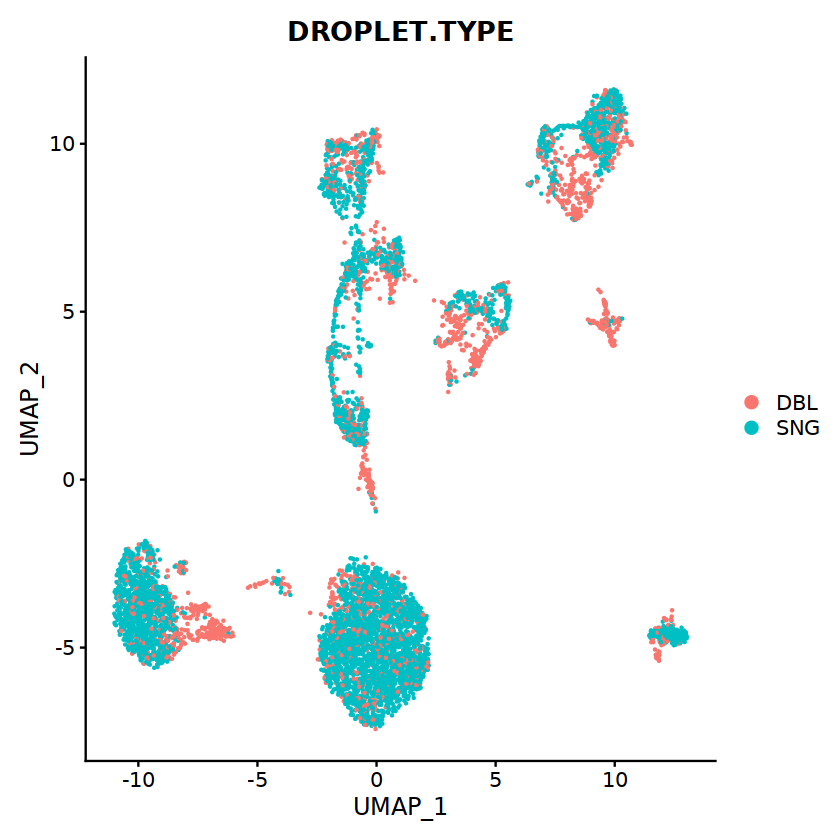

In [55]:
DimPlot(donor51, group.by = "DROPLET.TYPE")

In [56]:
table(donor51$DROPLET.TYPE)


 DBL  SNG 
2121 5215 

In [ ]:
# when you run doubletfinder originally you run sct per dataset 
# 

In [61]:
out <- '/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/sandbox/'

In [62]:
library(DoubletFinder)

In [64]:
sobj

An object of class Seurat 
242016 features across 159947 samples within 3 assays 
Active assay: RNA (36601 features, 2000 variable features)
 2 other assays present: SCT, ATAC_comb
 1 dimensional reduction calculated: pca

In [65]:
colnames(sobj@meta.data)

[1] "BARCODE"              "orig.ident"           "nCount_RNA"          
 [4] "nFeature_RNA"         "nCount_ATAC"          "nFeature_ATAC"       
 [7] "fragments_freq_count" "FRiP"                 "percent.mt"          
[10] "nCount_SCT"           "nFeature_SCT"         "INT_ID"              
[13] "NUM.SNPS"             "NUM.READS"            "DROPLET.TYPE"        
[16] "BEST.GUESS"           "BEST.LLK"             "NEXT.GUESS"          
[19] "NEXT.LLK"             "DIFF.LLK.BEST.NEXT"   "BEST.POSTERIOR"      
[22] "SNG.POSTERIOR"        "SNG.BEST.GUESS"       "SNG.BEST.LLK"        
[25] "SNG.NEXT.GUESS"       "SNG.NEXT.LLK"         "SNG.ONLY.POSTERIOR"  
[28] "DBL.BEST.GUESS"       "DBL.BEST.LLK"         "DIFF.LLK.SNG.DBL"    
[31] "nCount_ATAC_comb"     "nFeature_ATAC_comb"   "RNA_snn_res.0.5"     
[34] "seurat_clusters"

In [ ]:
DimPlot()

In [67]:
library(DT)


Attaching package: ‘DT’


The following object is masked from ‘package:Seurat’:

    JS


The following object is masked from ‘package:SeuratObject’:

    JS




In [69]:
find_nexp <- function(inp_cells) {

 rec_cells <- round_any(inp_cells, 1000, f=floor)

  # If number of cells inputted exceed table, manually set percent
  if(inp_cells > 10000) {
     chos_pt <- 0.076
     rec_cells <- 10000
  } else if(inp_cells < 1000){
     chos_pt <- 0.004
     rec_cells <- 500
  }
  else {
     mtable <- read.delim("/projects/ps-epigen/users/cmiciano/SenNet_Multiome/scripts/multiplet_rate.txt", sep=" ", header = T, stringsAsFactors = F)
     chos_pt <- mtable[which(mtable$recov_cells == rec_cells),c("percent")]
  }

     #Calculate percentage based on 10X multiplet rate table
     print(paste0("Chosen percent: ", chos_pt))
     calc_pt <- (inp_cells*chos_pt)/rec_cells
     print(paste0("Calculated percentage: ", calc_pt))

     #nExp for doublet finder param
     print(paste0("Number of cells after filtering: ", inp_cells))
     calc_nexp <- round(calc_pt*inp_cells) #multiply by number of cells after filtering instead of the estimated number of cells inputted as cellbender params
     print(paste0("Calculated nExp: ", calc_nexp))
     return(calc_nexp)
}


In [73]:
orig.ident <- 'UCSDX51'

[1] "Running DoubletFinder"


[1] "2023-11-20 12:48:07 PST"

[1] "Creating artificial doublets for pN = 5%"
[1] "Creating Seurat object..."
[1] "Running SCTransform..."


Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 28270 by 7722

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |======================================================================| 100%


Found 52 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 28270 genes



  |======================================================================| 100%


Computing corrected count matrix for 28270 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 2.064183 mins

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT



[1] "Running PCA..."


PC_ 1 
Positive:  LRRK2, SFTPB, MACROD2, ANK3, TMEM163, AGBL1, ZNF385B, PDE4D, DMBT1, ROS1 
	   SGPP2, ERBB4, NTM, CAMK1D, DLG2, SGMS2, EPS8, STEAP4, SFTPC, AFF3 
	   SLC6A14, LMO7, LHFPL3-AS2, ACOXL, ANKRD28, ACSL4, AC096531.2, MAST4, P3H2, ARHGEF38 
Negative:  LSAMP, ROBO2, RYR2, CACNA1C, CCDC102B, LAMA2, SLIT3, SLIT2, PIEZO2, SGIP1 
	   THBS1, FN1, HMCN1, COL5A2, ADGRB3, STEAP2, SDK1, COL6A3, A2M, CBLB 
	   NCAM2, NFATC2, ITGA8, PDZRN3, CRISPLD2, BICC1, LAMA4, NR2F1-AS1, CDH11, SRGAP1 
PC_ 2 
Positive:  NTM, NCKAP5, KHDRBS2, RBMS3, ROBO2, RYR2, LMO7, AC027288.3, RTKN2, EMP2 
	   GPC5, MAP2, CLIC5, HULC, PRKG1, AC022325.2, CACNA1C, SLIT2, SLIT3, CCDC102B 
	   AL355499.1, GPRC5D-AS1, COL4A3, LAMA2, PIEZO2, SGIP1, ABI3BP, HMCN1, COL4A2, DST 
Negative:  MRC1, PTPRC, SLC8A1, ZEB2, MSR1, PPARG, SLC11A1, KYNU, SLC16A10, KCNMA1 
	   MT-CO2, AC105402.3, OLR1, MT-CO1, DOCK8, ALOX5, ATP2B1, MT-CO3, PLXDC2, STAC 
	   CCDC88A, DOCK10, TBXAS1, MT-ND3, DOCK2, GPCPD1, TFRC, MT-ATP6, PIK3R5, ANPEP 


[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 10%"
[1] "Creating Seurat object..."
[1] "Running SCTransform..."


Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 28570 by 8151

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |======================================================================| 100%


Found 88 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 28570 genes



  |======================================================================| 100%


Computing corrected count matrix for 28570 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 2.127949 mins

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT



[1] "Running PCA..."


PC_ 1 
Positive:  LSAMP, ROBO2, RYR2, CACNA1C, CCDC102B, LAMA2, SLIT3, SLIT2, PIEZO2, SGIP1 
	   THBS1, HMCN1, FN1, COL5A2, ADGRB3, STEAP2, A2M, COL6A3, SDK1, NCAM2 
	   NFATC2, ITGA8, PDZRN3, CRISPLD2, LAMA4, BICC1, CBLB, NR2F1-AS1, CDH11, SRGAP1 
Negative:  LRRK2, SFTPB, MACROD2, ANK3, NTM, TMEM163, PDE4D, AGBL1, ZNF385B, DMBT1 
	   ROS1, SGPP2, ERBB4, CAMK1D, LMO7, STEAP4, SGMS2, SFTPC, EPS8, SLC6A14 
	   AFF3, DLG2, LHFPL3-AS2, ACOXL, ANKRD28, P3H2, ACSL4, AC096531.2, GPC5, ARHGEF38 
PC_ 2 
Positive:  NTM, NCKAP5, KHDRBS2, RBMS3, ROBO2, RYR2, RTKN2, AC027288.3, LMO7, GPC5 
	   EMP2, CLIC5, AC022325.2, MAP2, HULC, SLIT3, AL355499.1, CACNA1C, SLIT2, PRKG1 
	   CCDC102B, GPRC5D-AS1, COL4A3, LAMA2, PIEZO2, SGIP1, ABI3BP, HMCN1, LINC01290, ROR1 
Negative:  MRC1, MSR1, SLC8A1, PTPRC, PPARG, ZEB2, SLC11A1, KYNU, SLC16A10, KCNMA1 
	   MT-CO2, OLR1, AC105402.3, MT-CO1, ALOX5, DOCK8, CCDC88A, MT-CO3, ATP2B1, STAC 
	   PLXDC2, DOCK10, TFRC, TBXAS1, DOCK2, MT-ND3, ARHGAP18, GPCPD1, MT-ATP6, AN

[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 15%"
[1] "Creating Seurat object..."
[1] "Running SCTransform..."


Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 28860 by 8631

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |======================================================================| 100%


Found 109 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 28860 genes



  |======================================================================| 100%


Computing corrected count matrix for 28860 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 2.312212 mins

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT



[1] "Running PCA..."


PC_ 1 
Positive:  LRRK2, SFTPB, MACROD2, ANK3, TMEM163, DMBT1, PDE4D, AGBL1, NTM, ZNF385B 
	   ROS1, SGPP2, ERBB4, SLC6A14, CAMK1D, STEAP4, SFTPC, SGMS2, EPS8, DLG2 
	   LMO7, AFF3, LHFPL3-AS2, ACOXL, ANKRD28, P3H2, AC096531.2, ARHGEF38, AC019117.1, TOX 
Negative:  ROBO2, LSAMP, RYR2, CACNA1C, LAMA2, SLIT2, CCDC102B, SLIT3, PIEZO2, THBS1 
	   SGIP1, HMCN1, FN1, COL5A2, ADGRB3, STEAP2, SDK1, A2M, NFATC2, COL6A3 
	   NCAM2, CBLB, CRISPLD2, ITGA8, PDZRN3, LAMA4, SRGAP1, BICC1, CDH11, NR2F1-AS1 
PC_ 2 
Positive:  NTM, NCKAP5, KHDRBS2, RBMS3, ROBO2, RTKN2, AC027288.3, LMO7, RYR2, CLIC5 
	   GPC5, EMP2, MAP2, AC022325.2, HULC, AL355499.1, GPRC5D-AS1, COL4A3, SLIT2, PRKG1 
	   SLIT3, CACNA1C, CCDC102B, LAMA2, LINC01290, ABI3BP, PIEZO2, ROR1, COL4A2, SGIP1 
Negative:  MRC1, PPARG, MSR1, SLC8A1, ZEB2, PTPRC, SLC11A1, KYNU, SLC16A10, KCNMA1 
	   MT-CO2, AC105402.3, OLR1, MT-CO1, DOCK8, ATP2B1, MT-CO3, PLXDC2, ALOX5, CCDC88A 
	   STAC, DOCK10, TFRC, MT-ND3, GPCPD1, TBXAS1, DOCK2, ARHGAP18, MT-ATP

[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 20%"
[1] "Creating Seurat object..."
[1] "Running SCTransform..."


Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 29174 by 9170

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |======================================================================| 100%


Found 86 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 29174 genes



  |======================================================================| 100%


Computing corrected count matrix for 29174 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 2.241357 mins

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT



[1] "Running PCA..."


PC_ 1 
Positive:  LSAMP, ROBO2, RYR2, CACNA1C, CCDC102B, SLIT3, LAMA2, SLIT2, PIEZO2, SGIP1 
	   THBS1, HMCN1, FN1, COL5A2, ADGRB3, STEAP2, SDK1, COL6A3, A2M, NCAM2 
	   CBLB, ITGA8, PDZRN3, NFATC2, CRISPLD2, BICC1, LAMA4, CDH11, NR2F1-AS1, PLXDC2 
Negative:  LRRK2, SFTPB, MACROD2, ANK3, TMEM163, AGBL1, PDE4D, DMBT1, ZNF385B, ROS1 
	   SGPP2, ERBB4, NTM, STEAP4, SFTPC, CAMK1D, SGMS2, EPS8, DLG2, SLC6A14 
	   AFF3, LHFPL3-AS2, LMO7, ACOXL, ANKRD28, AC096531.2, P3H2, ACSL4, ARHGEF38, TOX 
PC_ 2 
Positive:  NTM, NCKAP5, KHDRBS2, RBMS3, ROBO2, RTKN2, GPC5, AC027288.3, EMP2, LMO7 
	   HULC, RYR2, MAP2, CLIC5, AC022325.2, GPRC5D-AS1, COL4A3, AL355499.1, PRKG1, SLIT3 
	   CCDC102B, CACNA1C, ROR1, SLIT2, DST, LAMA2, COL4A2, PIEZO2, SAMD4A, SGIP1 
Negative:  MRC1, PPARG, MSR1, SLC8A1, ZEB2, SLC11A1, PTPRC, KYNU, SLC16A10, KCNMA1 
	   MT-CO2, AC105402.3, MT-CO1, OLR1, MT-CO3, ATP2B1, PLXDC2, ALOX5, DOCK8, STAC 
	   MT-ND3, GPCPD1, CCDC88A, MT-ATP6, TFRC, DOCK10, TBXAS1, DOCK2, ANPEP, LYZ 
PC_ 3 

[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 25%"
[1] "Creating Seurat object..."
[1] "Running SCTransform..."


Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 29462 by 9781

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |======================================================================| 100%


Found 111 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 29462 genes



  |======================================================================| 100%


Computing corrected count matrix for 29462 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 2.312945 mins

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT



[1] "Running PCA..."


PC_ 1 
Positive:  ROBO2, LSAMP, RYR2, CCDC102B, CACNA1C, LAMA2, SLIT2, SLIT3, PIEZO2, SGIP1 
	   THBS1, HMCN1, FN1, COL5A2, ADGRB3, STEAP2, SDK1, A2M, NCAM2, COL6A3 
	   NFATC2, ITGA8, PDZRN3, CRISPLD2, CBLB, BICC1, LAMA4, CDH11, NR2F1-AS1, SRGAP1 
Negative:  LRRK2, SFTPB, NTM, MACROD2, ANK3, AGBL1, DMBT1, TMEM163, ZNF385B, PDE4D 
	   SGPP2, ROS1, ERBB4, SLC6A14, STEAP4, LMO7, SFTPC, SGMS2, CAMK1D, LHFPL3-AS2 
	   EPS8, NCKAP5, AFF3, KHDRBS2, DLG2, P3H2, ACOXL, GPC5, AC096531.2, ARHGEF38 
PC_ 2 
Positive:  NTM, NCKAP5, KHDRBS2, ROBO2, RTKN2, RBMS3, AC027288.3, GPC5, RYR2, CLIC5 
	   LMO7, EMP2, AC022325.2, MAP2, HULC, AL355499.1, GPRC5D-AS1, COL4A3, SLIT3, CCDC102B 
	   SLIT2, CACNA1C, PRKG1, LAMA2, ROR1, PIEZO2, LINC01290, ABI3BP, SGIP1, COL4A2 
Negative:  MRC1, PPARG, MSR1, SLC8A1, ZEB2, PTPRC, SLC11A1, KYNU, SLC16A10, KCNMA1 
	   MT-CO2, OLR1, AC105402.3, MT-CO1, ALOX5, DOCK8, STAC, ATP2B1, PLXDC2, MT-CO3 
	   CCDC88A, DOCK10, TFRC, ANPEP, LYZ, GPCPD1, TBXAS1, MT-ND3, DOCK2, ARHGAP1

[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 30%"
[1] "Creating Seurat object..."
[1] "Running SCTransform..."


Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 29725 by 10480

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |======================================================================| 100%


There are 1 estimated thetas smaller than 1e-07 - will be set to 1e-07

Found 118 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 29725 genes



  |======================================================================| 100%


Computing corrected count matrix for 29725 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 2.539487 mins

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT



[1] "Running PCA..."


PC_ 1 
Positive:  ROBO2, LSAMP, RYR2, LAMA2, CCDC102B, SLIT3, CACNA1C, SLIT2, PIEZO2, SGIP1 
	   THBS1, FN1, HMCN1, COL5A2, ADGRB3, STEAP2, SDK1, NCAM2, A2M, COL6A3 
	   NFATC2, PDZRN3, CBLB, CRISPLD2, ITGA8, BICC1, CDH11, NR2F1-AS1, LAMA4, FAT3 
Negative:  LRRK2, SFTPB, MACROD2, NTM, ANK3, AGBL1, TMEM163, DMBT1, ZNF385B, PDE4D 
	   SGPP2, ROS1, ERBB4, STEAP4, SFTPC, SLC6A14, SGMS2, CAMK1D, EPS8, LMO7 
	   LHFPL3-AS2, AFF3, DLG2, ACOXL, P3H2, AC096531.2, ARHGEF38, KHDRBS2, TOX, ANKRD28 
PC_ 2 
Positive:  NTM, NCKAP5, KHDRBS2, ROBO2, RBMS3, RTKN2, RYR2, AC027288.3, GPC5, EMP2 
	   LMO7, MAP2, CLIC5, HULC, AC022325.2, GPRC5D-AS1, SLIT3, COL4A3, AL355499.1, CCDC102B 
	   CACNA1C, SLIT2, PRKG1, LAMA2, ROR1, PIEZO2, SGIP1, ABI3BP, COL4A2, LINC01290 
Negative:  MRC1, PPARG, MSR1, SLC8A1, ZEB2, SLC11A1, PTPRC, KYNU, SLC16A10, KCNMA1 
	   MT-CO2, OLR1, AC105402.3, MT-CO1, STAC, MT-CO3, ATP2B1, ALOX5, PLXDC2, DOCK8 
	   LYZ, CCDC88A, MT-ND3, GPCPD1, ANPEP, TFRC, DOCK10, MT-ATP6, FTL, FABP4 
PC_

[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
NULL


HTML widgets cannot be represented in plain text (need html)

[1] "Potential pK: 0.2"


ERROR: Error in paste0(lib_rna_atac_id, "_pKplot"): object 'lib_rna_atac_id' not found


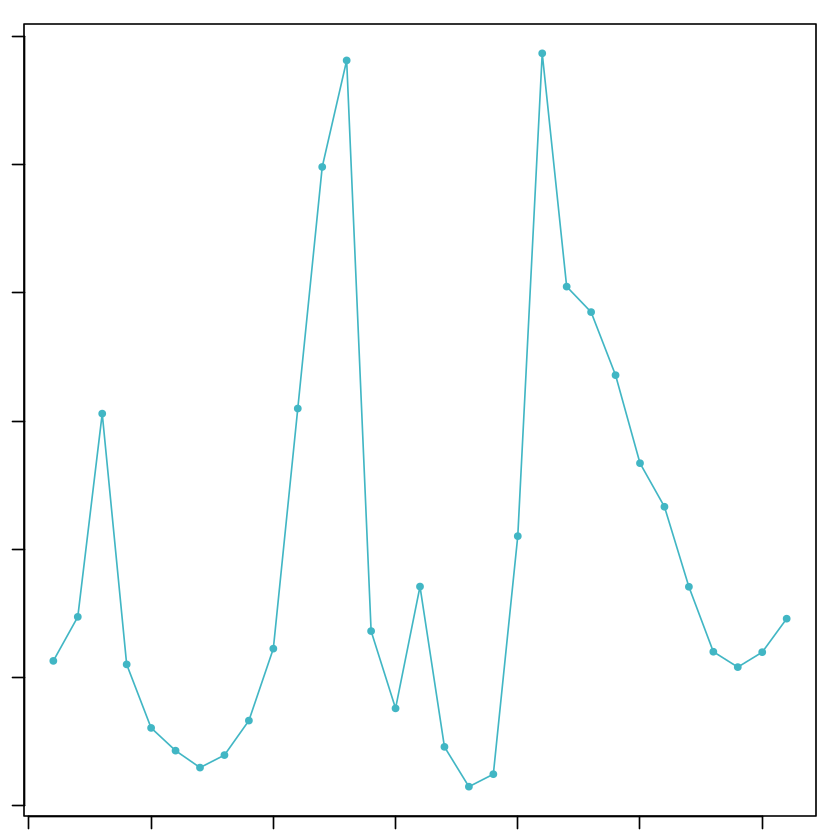

In [70]:
print("Running DoubletFinder")
#print("Finding pK...")
Sys.time()

sweep.donor51 <- paramSweep_v3(donor51, PCs = 1:50, sct = TRUE)
sweep.stats.donor51 <- summarizeSweep(sweep.donor51, GT = FALSE)
bcmvn.donor51 <- find.pK(sweep.stats.donor51)
datatable(bcmvn.donor51, rownames = F)

# choosing maxima of BCmetric
pK <- as.numeric(as.character(bcmvn.donor51$pK))
top_pK <- pK[which(bcmvn.donor51$BCmetric %in% max(bcmvn.donor51$BCmetric))]
print(paste("Potential pK:", top_pK, sep = " "))

## You will see this "bcmvn.donor51" is a dataframe with 5 columns, which are: ParamID, pK, MeanBC,  VarBC, BCmetric


In [72]:
 top_pK

[1] 0.2

In [78]:
library(plyr)
library(ggplot2)

In [77]:
Sys.time()
## Note that the "pK" column could be a factor, so converted to character and then numeric might be necessary.
dir.create(path= paste0(out,"pK_plots"), showWarnings= FALSE)
pdf(file=paste0(out,"pK_plots/",orig.ident, "_pKplot.pdf"), title= paste0(orig.ident,"_pKplot"), width= 12, height= 10, compress=FALSE)
plot(x = as.numeric(as.character(bcmvn.donor51$pK)), y = as.numeric(bcmvn.donor51$BCmetric), pch = 16, col = "#41b6c4", cex = 0.75, xlab="pK", ylab="BCmetric")
lines(x = as.numeric(as.character(bcmvn.donor51$pK)), y = bcmvn.donor51$BCmetric, col = "#41b6c4")
title(main = paste0(orig.ident," ", "Top pK: ", top_pK))
abline(v=top_pK,lwd=2,col='red',lty=2)
dev.off()


# Calculating nEXP
# jb185 (est # cells - 8644)

print("Calculating nExp...")
cells_aft_filt <- nrow(donor51@meta.data)
calc_nExp <- find_nexp(cells_aft_filt)
nExp_poi_donor51 <- round(calc_nExp*nrow(donor51@meta.data))
print(paste0("Calculated nExp: ", calc_nExp))

donor51 <- doubletFinder_v3(donor51, PCs = 1:50, pN = 0.25 , pK = top_pK, nExp = calc_nExp, reuse.pANN = FALSE, sct = TRUE)



[1] "2023-11-20 13:20:17 PST"

png 
  2

[1] "Calculating nExp..."
[1] "Chosen percent: 0.054"
[1] "Calculated percentage: 0.056592"
[1] "Number of cells after filtering: 7336"
[1] "Calculated nExp: 415"
[1] "Calculated nExp: 415"
[1] "Creating 2445 artificial doublets..."
[1] "Creating Seurat object..."
[1] "Running SCTransform..."


Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 29462 by 9781

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |======================================================================| 100%


Found 111 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 29462 genes



  |======================================================================| 100%


Computing corrected count matrix for 29462 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 2.438299 mins

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT



[1] "Running PCA..."


PC_ 1 
Positive:  ROBO2, LSAMP, RYR2, CCDC102B, CACNA1C, LAMA2, SLIT2, SLIT3, PIEZO2, SGIP1 
	   THBS1, HMCN1, FN1, COL5A2, ADGRB3, STEAP2, SDK1, A2M, NCAM2, COL6A3 
	   NFATC2, ITGA8, PDZRN3, CRISPLD2, CBLB, BICC1, LAMA4, CDH11, NR2F1-AS1, SRGAP1 
Negative:  LRRK2, SFTPB, NTM, MACROD2, ANK3, AGBL1, DMBT1, TMEM163, ZNF385B, PDE4D 
	   SGPP2, ROS1, ERBB4, SLC6A14, STEAP4, LMO7, SFTPC, SGMS2, CAMK1D, LHFPL3-AS2 
	   EPS8, NCKAP5, AFF3, KHDRBS2, DLG2, P3H2, ACOXL, GPC5, AC096531.2, ARHGEF38 
PC_ 2 
Positive:  NTM, NCKAP5, KHDRBS2, ROBO2, RTKN2, RBMS3, AC027288.3, GPC5, RYR2, CLIC5 
	   LMO7, EMP2, AC022325.2, MAP2, HULC, AL355499.1, GPRC5D-AS1, COL4A3, SLIT3, CCDC102B 
	   SLIT2, CACNA1C, PRKG1, LAMA2, ROR1, PIEZO2, LINC01290, ABI3BP, SGIP1, COL4A2 
Negative:  MRC1, PPARG, MSR1, SLC8A1, ZEB2, PTPRC, SLC11A1, KYNU, SLC16A10, KCNMA1 
	   MT-CO2, OLR1, AC105402.3, MT-CO1, ALOX5, DOCK8, STAC, ATP2B1, PLXDC2, MT-CO3 
	   CCDC88A, DOCK10, TFRC, ANPEP, LYZ, GPCPD1, TBXAS1, MT-ND3, DOCK2, ARHGAP1

[1] "Calculating PC distance matrix..."
[1] "Computing pANN..."
[1] "Classifying doublets.."


ERROR: Error in theme(aspect.ratio = 1): could not find function "theme"


[1] "Creating doublet plots..."


[1] "2023-11-20 13:23:50 PST"

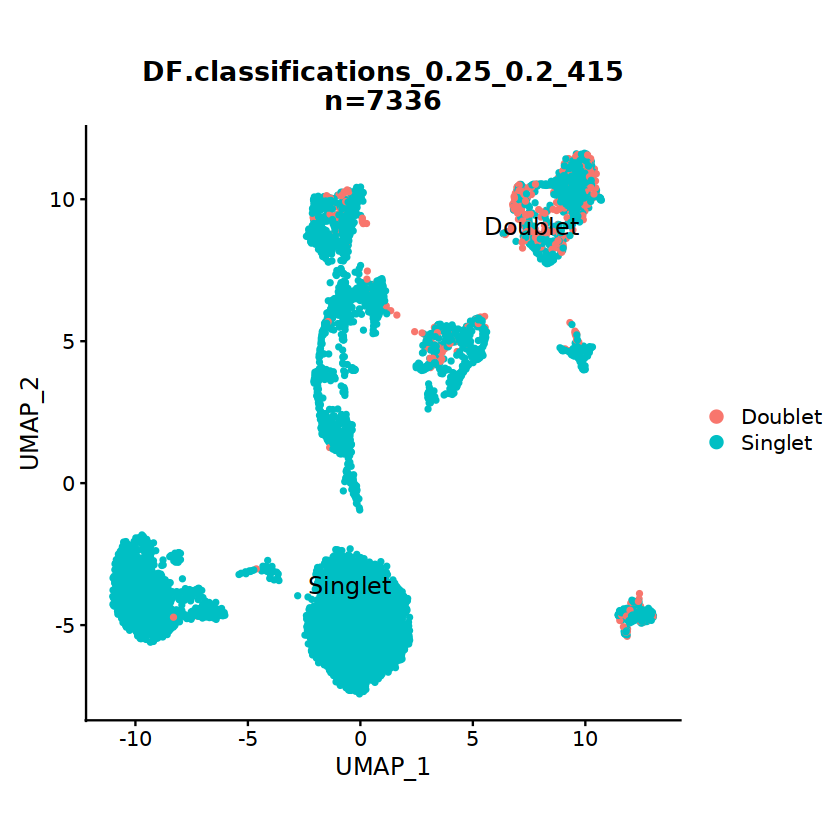

In [79]:

md <- donor51@meta.data
df_col_nm <-  grep("DF.classifications",colnames(md), value = T)
cell_num <- length(colnames(donor51)) #number of barcodes
dbs_plt <- DimPlot(donor51,pt.size = 1,label=TRUE, label.size = 5,reduction = "umap",group.by = df_col_nm )+theme(aspect.ratio = 1) + ggtitle(paste0(df_col_nm , "\n", "n=", cell_num))


print("Creating doublet plots...")
dir.create(path= paste0(out,"doublet_plots"), showWarnings= FALSE)
#pdf(file=paste0(out,"doublet_plots/",orig.ident, "_dbplots.pdf"), title= paste0(orig.ident,"_doublet_plots"), width= 12, height= 10, compress=FALSE)
dbs_plt
#dev.off()

Sys.time()

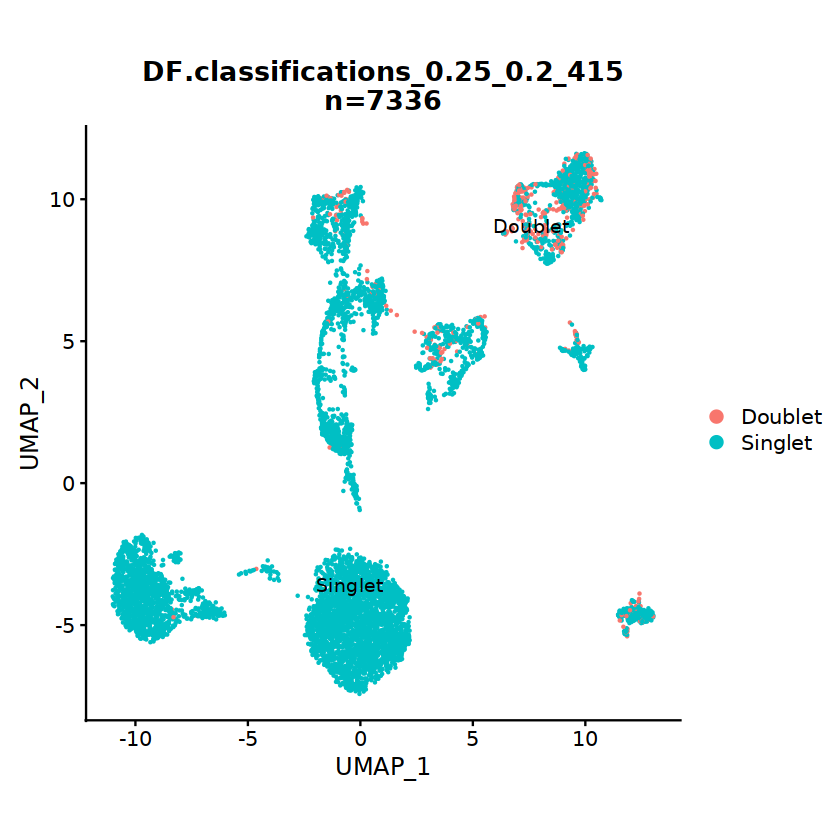

In [82]:
dbs_plt <- DimPlot(donor51, label=TRUE,reduction = "umap",group.by = df_col_nm )+theme(aspect.ratio = 1) + ggtitle(paste0(df_col_nm , "\n", "n=", cell_num))
dbs_plt

In [89]:
tb_df <- table(donor51$DF.classifications_0.25_0.2_415)
tb_df


Doublet Singlet 
    415    6921 

In [90]:
proportions <- tb_df / length(donor51$DF.classifications_0.25_0.2_415)
proportions


   Doublet    Singlet 
0.05657034 0.94342966 

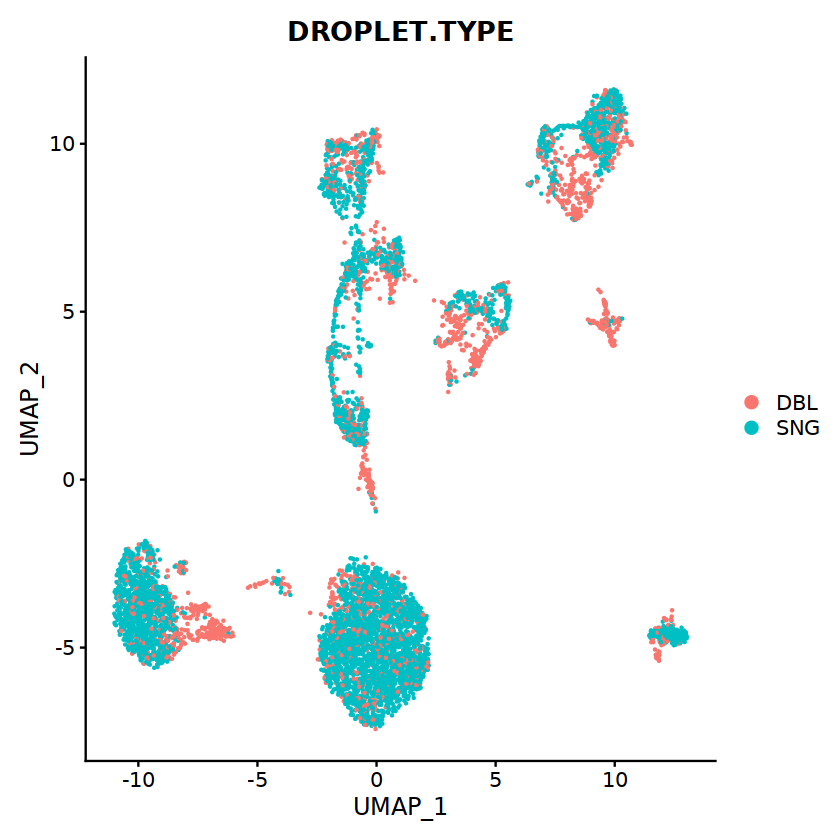

In [80]:
DimPlot(donor51, group.by = "DROPLET.TYPE")

In [91]:
tb_demux <- table(donor51$DROPLET.TYPE)

proportions <- tb_demux / length(donor51$DF.classifications_0.25_0.2_415)
proportions


      DBL       SNG 
0.2891221 0.7108779 

In [92]:
head(donor51@meta.data)

,BARCODE,orig.ident,nCount_RNA,nFeature_RNA,nCount_ATAC,nFeature_ATAC,fragments_freq_count,FRiP,percent.mt,nCount_SCT,nFeature_SCT,INT_ID,NUM.SNPS,NUM.READS,DROPLET.TYPE,BEST.GUESS,BEST.LLK,NEXT.GUESS,NEXT.LLK,DIFF.LLK.BEST.NEXT,BEST.POSTERIOR,SNG.POSTERIOR,SNG.BEST.GUESS,SNG.BEST.LLK,SNG.NEXT.GUESS,SNG.NEXT.LLK,SNG.ONLY.POSTERIOR,DBL.BEST.GUESS,DBL.BEST.LLK,DIFF.LLK.SNG.DBL,nCount_ATAC_comb,nFeature_ATAC_comb,pANN_0.25_0.2_415,DF.classifications_0.25_0.2_415
,<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>
QY_2225_2_QY_2224_2_AAACAGCCAAACGGGC-1,AAACAGCCAAACGGGC-1,QY_2225_2_QY_2224_2,6581,3072,5854,2926,9272,0.6313632,1.10925391,6769,3047,7,1349,1351,SNG,"UCSDX51_UCSDX51,UCSDX51_UCSDX51,0.00",-243.32,"D381_D381,UCSDX51_UCSDX51,0.50",-301.66,58.34,-250,1,UCSDX51_UCSDX51,-243.32,D371_D371,-574.97,0,"D381_D381,UCSDX51_UCSDX51,0.50",-301.66,58.34,3588,3295,0.3287321,Singlet
QY_2225_2_QY_2224_2_AAACATGCAAGCTTTG-1,AAACATGCAAGCTTTG-1,QY_2225_2_QY_2224_2,5628,2037,1526,798,2839,0.5375132,0.12437811,6838,2025,436,478,486,SNG,"UCSDX51_UCSDX51,UCSDX51_UCSDX51,0.00",-97.52,"UCSDX13_UCSDX13,UCSDX51_UCSDX51,0.50",-127.59,30.06,-100,1,UCSDX51_UCSDX51,-97.52,UCSDX31_UCSDX31,-251.45,0,"UCSDX13_UCSDX13,UCSDX51_UCSDX51,0.50",-127.59,30.06,939,907,0.1625767,Singlet
QY_2225_2_QY_2224_2_AAACATGCAGGCGATA-1,AAACATGCAGGCGATA-1,QY_2225_2_QY_2224_2,8516,3143,4703,2460,12220,0.3848609,0.09394082,7851,3128,631,1445,1474,SNG,"UCSDX51_UCSDX51,UCSDX51_UCSDX51,0.00",-289.16,"D071_D071,UCSDX51_UCSDX51,0.50",-339.28,50.12,-290,1,UCSDX51_UCSDX51,-289.16,D071_D071,-641.08,0,"D071_D071,UCSDX51_UCSDX51,0.50",-339.28,50.12,3058,2890,0.1707566,Singlet
QY_2225_2_QY_2224_2_AAACCGAAGCACAGGG-1,AAACCGAAGCACAGGG-1,QY_2225_2_QY_2224_2,3072,1453,2413,1238,4772,0.5056580,0.09765625,6635,1519,1209,530,533,SNG,"UCSDX51_UCSDX51,UCSDX51_UCSDX51,0.00",-154.82,"D339_D339,UCSDX51_UCSDX51,0.50",-155.49,0.67,-160,1,UCSDX51_UCSDX51,-154.82,D339_D339,-240.21,0,"D339_D339,UCSDX51_UCSDX51,0.50",-155.49,0.67,1453,1397,0.1702454,Singlet
QY_2225_2_QY_2224_2_AAACCGAAGGCCAATT-1,AAACCGAAGGCCAATT-1,QY_2225_2_QY_2224_2,8726,2822,7851,3885,10507,0.7472161,0.59592024,7817,2813,1351,1610,1646,SNG,"UCSDX51_UCSDX51,UCSDX51_UCSDX51,0.00",-342.92,"D356_D356,UCSDX51_UCSDX51,0.50",-408.90,65.97,-350,1,UCSDX51_UCSDX51,-342.92,D283_D283,-752.47,0,"D356_D356,UCSDX51_UCSDX51,0.50",-408.90,65.97,4627,4267,0.1605317,Singlet
QY_2225_2_QY_2224_2_AAACCGCGTGCACGCA-1,AAACCGCGTGCACGCA-1,QY_2225_2_QY_2224_2,10106,2506,5482,2751,7160,0.7656425,0.25727291,7744,2496,1710,1246,1275,SNG,"UCSDX51_UCSDX51,UCSDX51_UCSDX51,0.00",-253.47,"UCSDX50_UCSDX50,UCSDX51_UCSDX51,0.50",-301.86,48.38,-260,1,UCSDX51_UCSDX51,-253.47,D265_D265,-579.14,0,"UCSDX50_UCSDX50,UCSDX51_UCSDX51,0.50",-301.86,48.38,3223,3010,0.1789366,Singlet


In [93]:
saveRDS(donor51, "/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/sandbox/UCSDX51_reproc_SCT_df.RDS")

In [20]:
df_obj1 <- readRDS('/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/01_DoubletFinder/df_objs/QY_2225_2_QY_2224_2_DF.0.05.RDS')

In [21]:
colnames(df_obj1@meta.data)

[1] "orig.ident"           "nCount_RNA"           "nFeature_RNA"        
 [4] "nCount_ATAC"          "nFeature_ATAC"        "fragments_freq_count"
 [7] "FRiP"                 "percent.mt"           "nCount_SCT"          
[10] "nFeature_SCT"